In [40]:
!pip install scikit-learn
!pip install scipy
import datetime
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
!pip install --upgrade sklearn
from sklearn import tree
plt.style.use('bmh')

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=c819fb64ab6bd7638807e2bfb8a8547fb8cd2f621027dd8fe8bcd097dd893e9a
  Stored in directory: C:\Users\Asher\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [41]:
df=pd.read_csv(r'C:\Users\Asher\.ipynb_checkpoints/TSLA.csv' )

print(df)


           Date         Open         High          Low        Close  \
0    2018-07-24   304.420013   307.720001   292.549988   297.429993   
1    2018-07-25   296.739990   309.619995   294.500000   308.739990   
2    2018-07-26   304.850006   310.700012   303.640015   306.649994   
3    2018-07-27   307.250000   307.690002   295.339996   297.179993   
4    2018-07-30   295.899994   296.100006   286.130005   290.170013   
..          ...          ...          ...          ...          ...   
499  2020-07-17  1513.449951  1537.510010  1490.000000  1500.839966   
500  2020-07-20  1519.010010  1650.000000  1488.000000  1643.000000   
501  2020-07-21  1639.930054  1675.000000  1558.000000  1568.359985   
502  2020-07-22  1599.000000  1626.420044  1562.000000  1592.329956   
503  2020-07-23  1678.949951  1689.000000  1480.770020  1513.069946   

       Adj Close    Volume  
0     297.429993   9590800  
1     308.739990   7075400  
2     306.649994   4630500  
3     297.179993   5703300  
4 

In [42]:
df.shape

(504, 7)

<function matplotlib.pyplot.show(*args, **kw)>

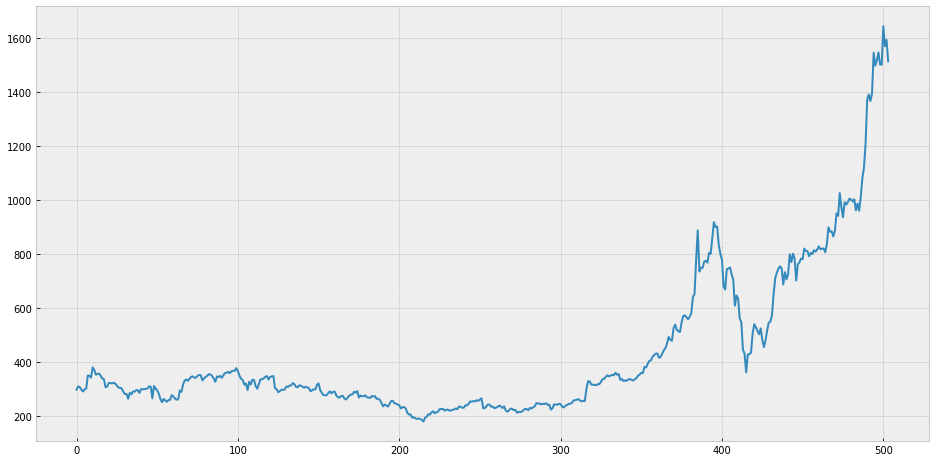

In [43]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show

In [44]:
df=df[['Close']]
df.head(1)


,Close
0,297.429993


In [45]:
future_days=25
df['Predictions']=df[['Close']].shift(-future_days)
df

,Close,Predictions
0,297.429993,311.859985
1,308.739990,305.010010
2,306.649994,303.149994
3,297.179993,301.660004
4,290.170013,288.950012
...,...,...
499,1500.839966,NaN
500,1643.000000,NaN
501,1568.359985,NaN
502,1592.329956,NaN


In [46]:
X=np.array(df.drop(['Predictions'],(1)))[:-future_days]
print(X)

[[ 297.429993]
 [ 308.73999 ]
 [ 306.649994]
 [ 297.179993]
 [ 290.170013]
 [ 298.140015]
 [ 300.839996]
 [ 349.540009]
 [ 348.170013]
 [ 341.98999 ]
 [ 379.570007]
 [ 370.339996]
 [ 352.450012]
 [ 355.48999 ]
 [ 356.410004]
 [ 347.640015]
 [ 338.690002]
 [ 335.450012]
 [ 305.5     ]
 [ 308.440002]
 [ 321.899994]
 [ 321.640015]
 [ 320.100006]
 [ 322.820007]
 [ 319.269989]
 [ 311.859985]
 [ 305.01001 ]
 [ 303.149994]
 [ 301.660004]
 [ 288.950012]
 [ 280.73999 ]
 [ 280.950012]
 [ 263.23999 ]
 [ 285.5     ]
 [ 279.440002]
 [ 290.540009]
 [ 289.459991]
 [ 295.200012]
 [ 294.839996]
 [ 284.959991]
 [ 299.019989]
 [ 298.329987]
 [ 299.100006]
 [ 299.679993]
 [ 300.98999 ]
 [ 309.579987]
 [ 307.519989]
 [ 264.769989]
 [ 310.700012]
 [ 301.019989]
 [ 294.799988]
 [ 281.829987]
 [ 261.950012]
 [ 250.559998]
 [ 262.799988]
 [ 256.880005]
 [ 252.229996]
 [ 258.779999]
 [ 259.589996]
 [ 276.589996]
 [ 271.779999]
 [ 263.910004]
 [ 260.      ]
 [ 260.950012]
 [ 294.140015]
 [ 288.5     ]
 [ 314.859

In [47]:
y=np.array(df['Predictions'])[:-future_days]
print(y)

[ 311.859985  305.01001   303.149994  301.660004  288.950012  280.73999
  280.950012  263.23999   285.5       279.440002  290.540009  289.459991
  295.200012  294.839996  284.959991  299.019989  298.329987  299.100006
  299.679993  300.98999   309.579987  307.519989  264.769989  310.700012
  301.019989  294.799988  281.829987  261.950012  250.559998  262.799988
  256.880005  252.229996  258.779999  259.589996  276.589996  271.779999
  263.910004  260.        260.950012  294.140015  288.5       314.859985
  330.899994  334.850006  329.899994  337.320007  344.279999  346.410004
  341.399994  341.059998  348.160004  351.399994  350.51001   331.279999
  338.730011  344.        348.440002  354.309998  353.470001  347.48999
  338.190002  325.829987  346.        343.920013  347.869995  341.170013
  350.480011  358.48999   359.700012  363.059998  357.970001  365.149994
  366.76001   366.600006  376.790009  365.709991  348.420013  337.029999
  332.970001  315.380005  319.769989  295.390015  326

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [52]:
tree=DecisionTreeRegressor().fit(x_train,y_train)

In [53]:
x_future=(df.drop(['Predictions'],(1)))[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[ 790.960022],
       [ 803.330017],
       [ 799.169983],
       [ 813.630005],
       [ 808.01001 ],
       [ 815.559998],
       [ 827.599976],
       [ 816.880005],
       [ 818.869995],
       [ 820.22998 ],
       [ 805.809998],
       [ 835.      ],
       [ 898.099976],
       [ 881.559998],
       [ 882.960022],
       [ 864.380005],
       [ 885.659973],
       [ 949.919983],
       [ 940.669983],
       [1025.050049],
       [ 972.840027],
       [ 935.280029],
       [ 990.900024],
       [ 982.130005],
       [ 991.789978]])

In [54]:
tree_predicton=tree.predict(x_future)
print(tree_predicton)

[1003.960022 1000.900024  994.320007 1001.780029  960.849976  985.97998
  959.73999  1009.349976 1079.810059 1119.630005  427.529999  959.73999
  528.159973 1365.880005 1394.280029 1544.650024 1394.280029 1516.800049
 1546.01001  1513.069946 1500.839966 1643.       1568.359985 1568.359985
 1513.069946]


C:\Users\Asher\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


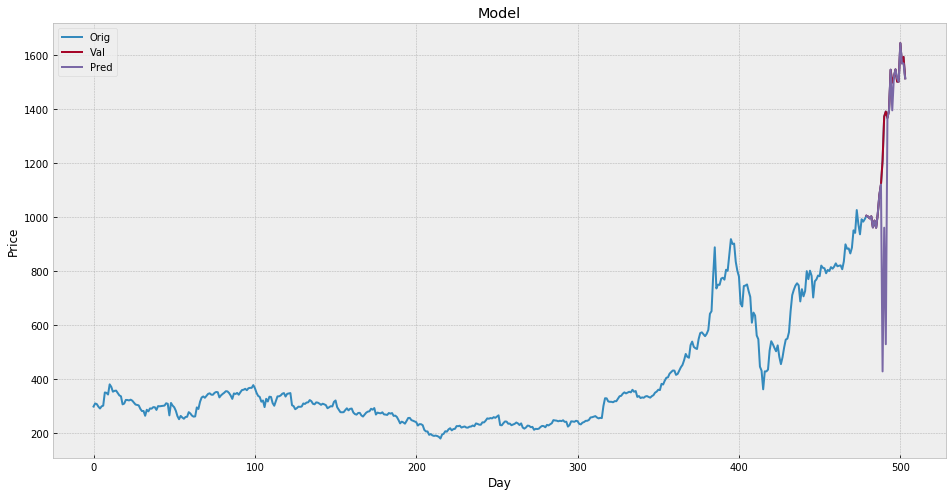

In [55]:
prediction=tree_predicton

valid=df[X.shape[0]:]
valid['Predictions']=prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Day')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()